In [1]:
import pandas as pd
import numpy as np
from pysankey import sankey
import matplotlib.pyplot as plt

In [ ]:
all_pairs = pd.read_csv('AllTransactions.csv',usecols=[7,19,27])
all_pairs.groupby(['AcquiringRegistry','TransferringRegistry']).sum().to_csv('Paired.csv')

In [2]:
pairs = pd.read_csv('Paired.csv')
pairs

AcquiringRegistry TransferringRegistry    NbOfUnits
0           Australia               France      1032850
1           Australia              Germany     12653950
2           Australia                Italy       866193
3           Australia            Lithuania       186503
4           Australia          Netherlands      8896104
..                ...                  ...          ...
872     UnitedKingdom              Ukraine    205203176
873     UnitedKingdom        UnitedKingdom  41968560645
874           Ukraine              Ukraine            0
875   NorthernIreland      NorthernIreland            0
876               ESD                  ESD            0

[877 rows x 3 columns]

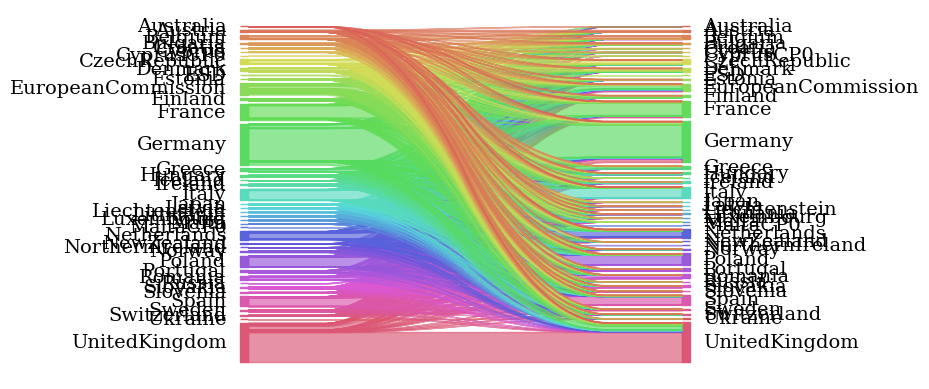

In [7]:
ax1 = plt.axes()

ax1 = sankey(
    left=pairs["AcquiringRegistry"], right=pairs["TransferringRegistry"], 
    leftWeight= pairs["NbOfUnits"], rightWeight=pairs["NbOfUnits"],
    leftLabels=np.flip(np.sort(pairs['TransferringRegistry'].unique())),rightLabels=np.flip(np.sort(pairs['TransferringRegistry'].unique())),
    ax=ax1
)

fig = ax1.get_figure()
fig.set_size_inches(18, 28)
fig.savefig('ETS_Sankey_all.png',bbox_inches='tight',dpi=250)
fig

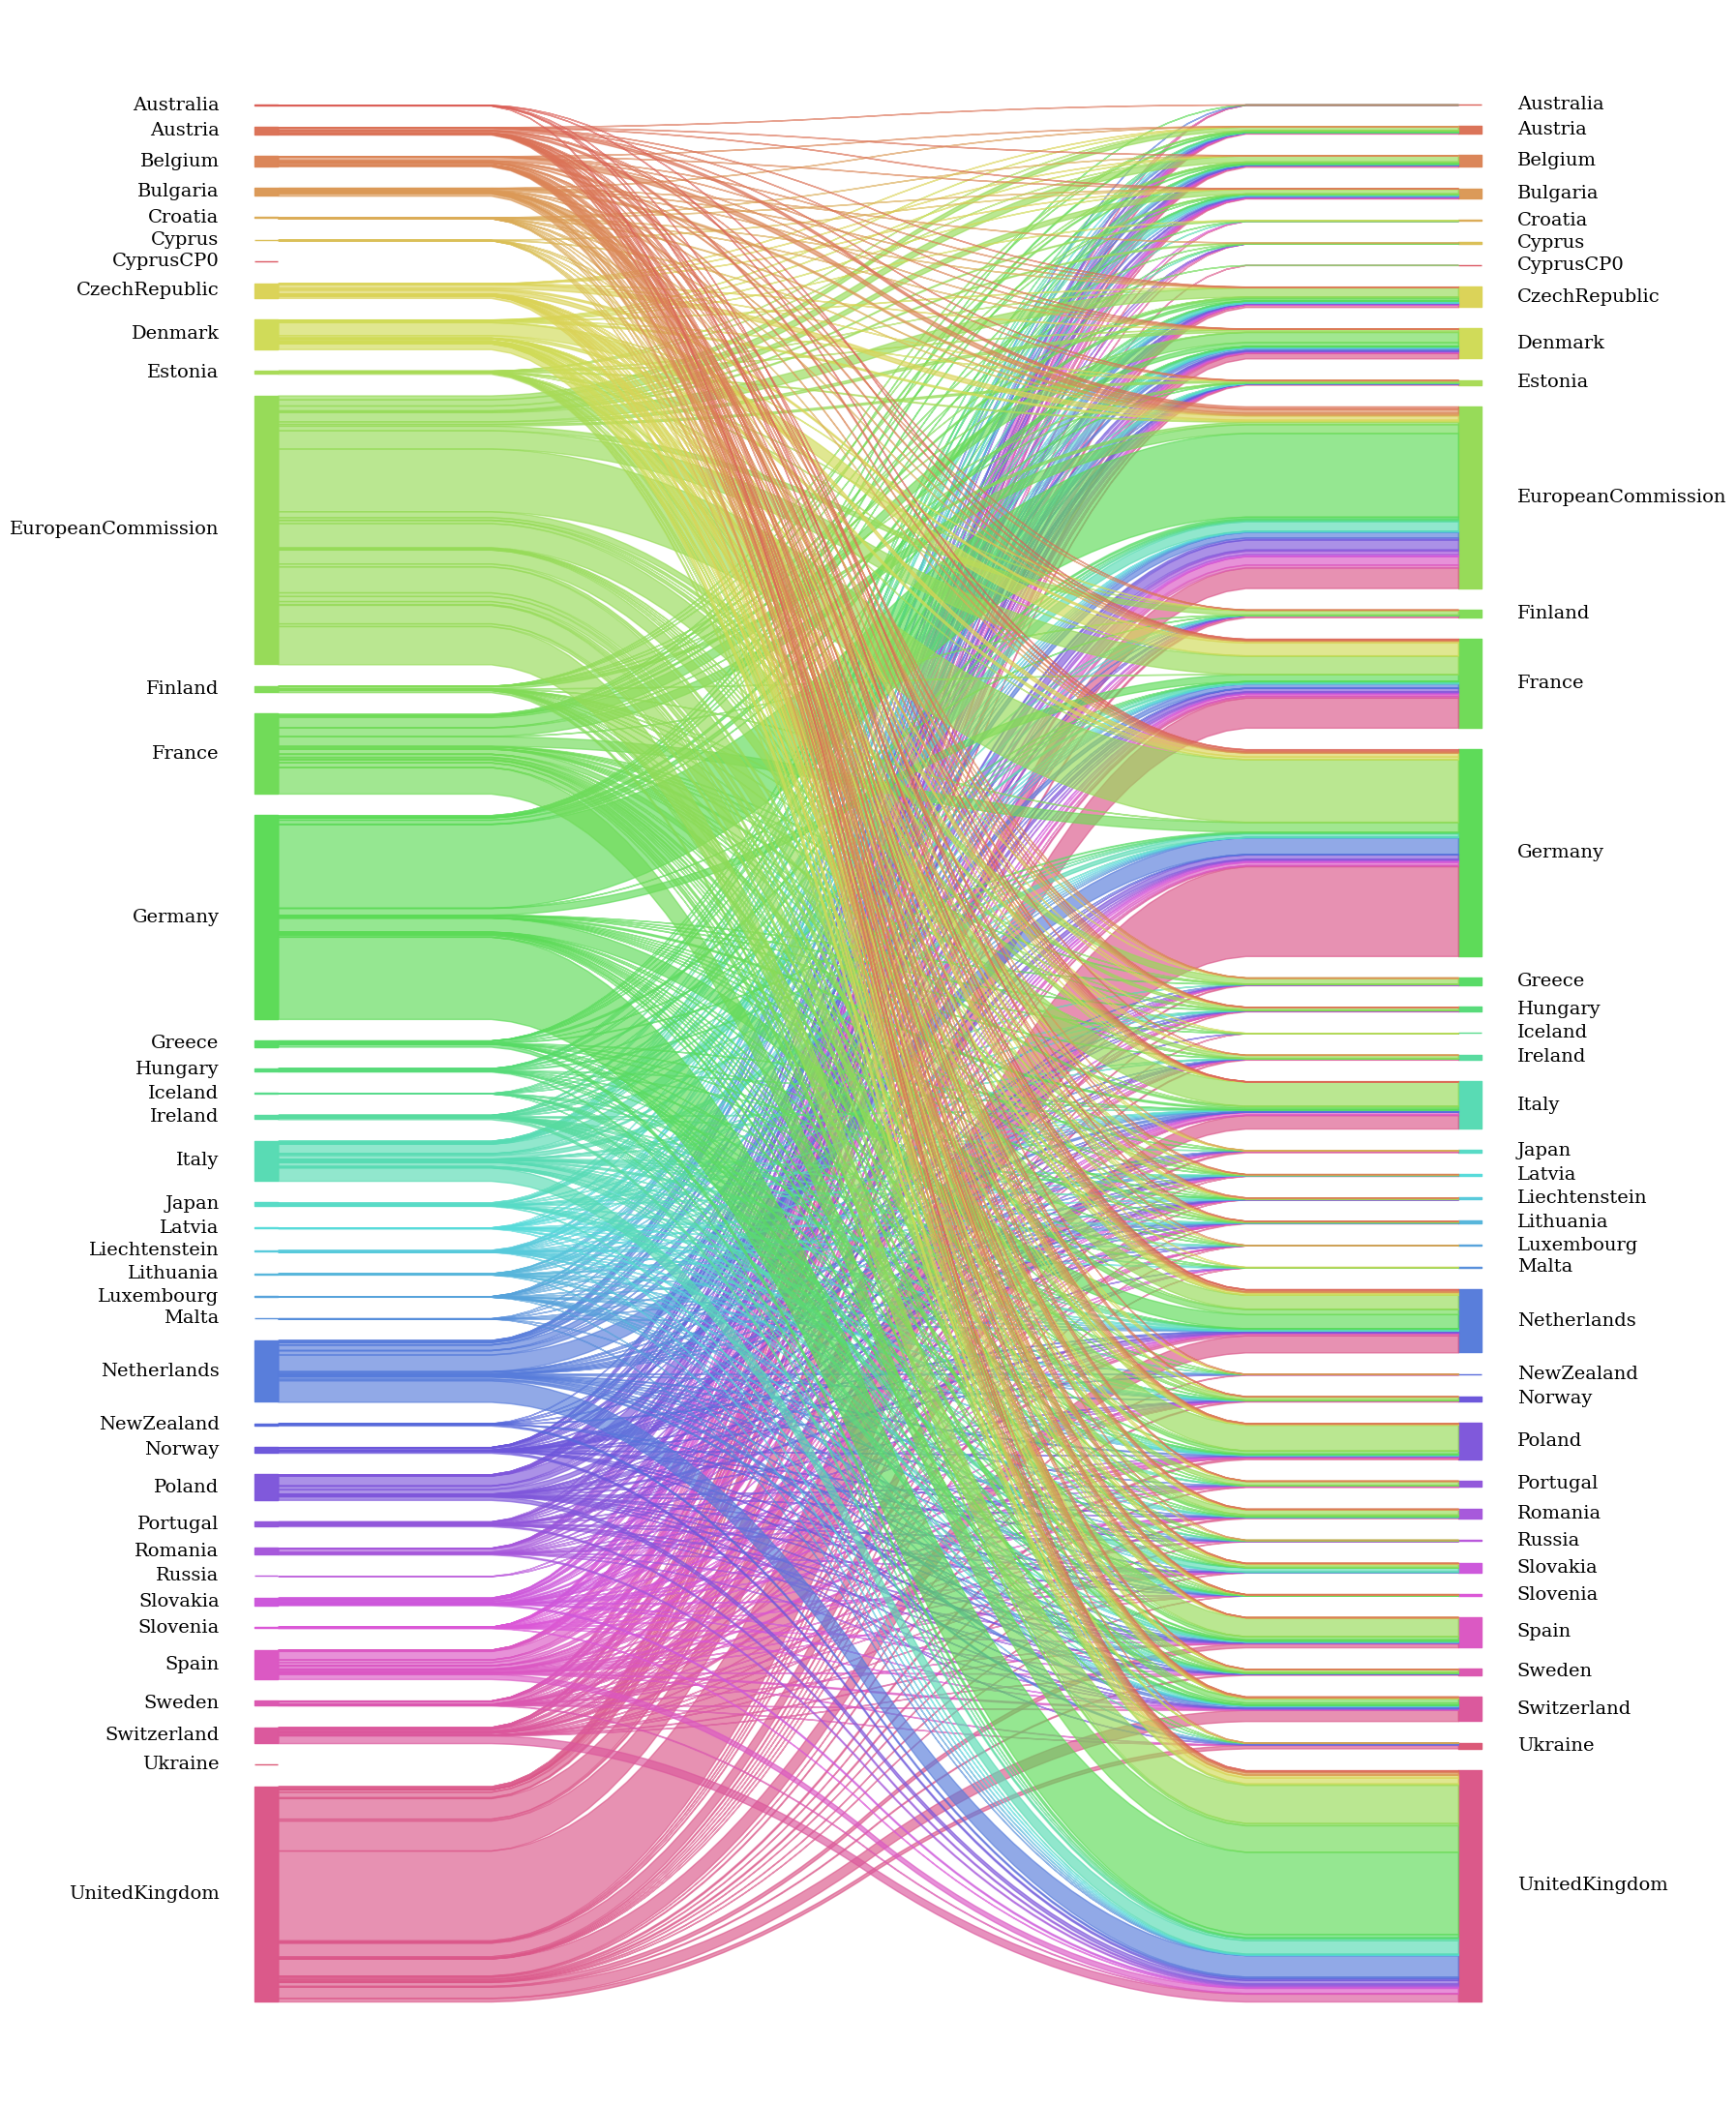

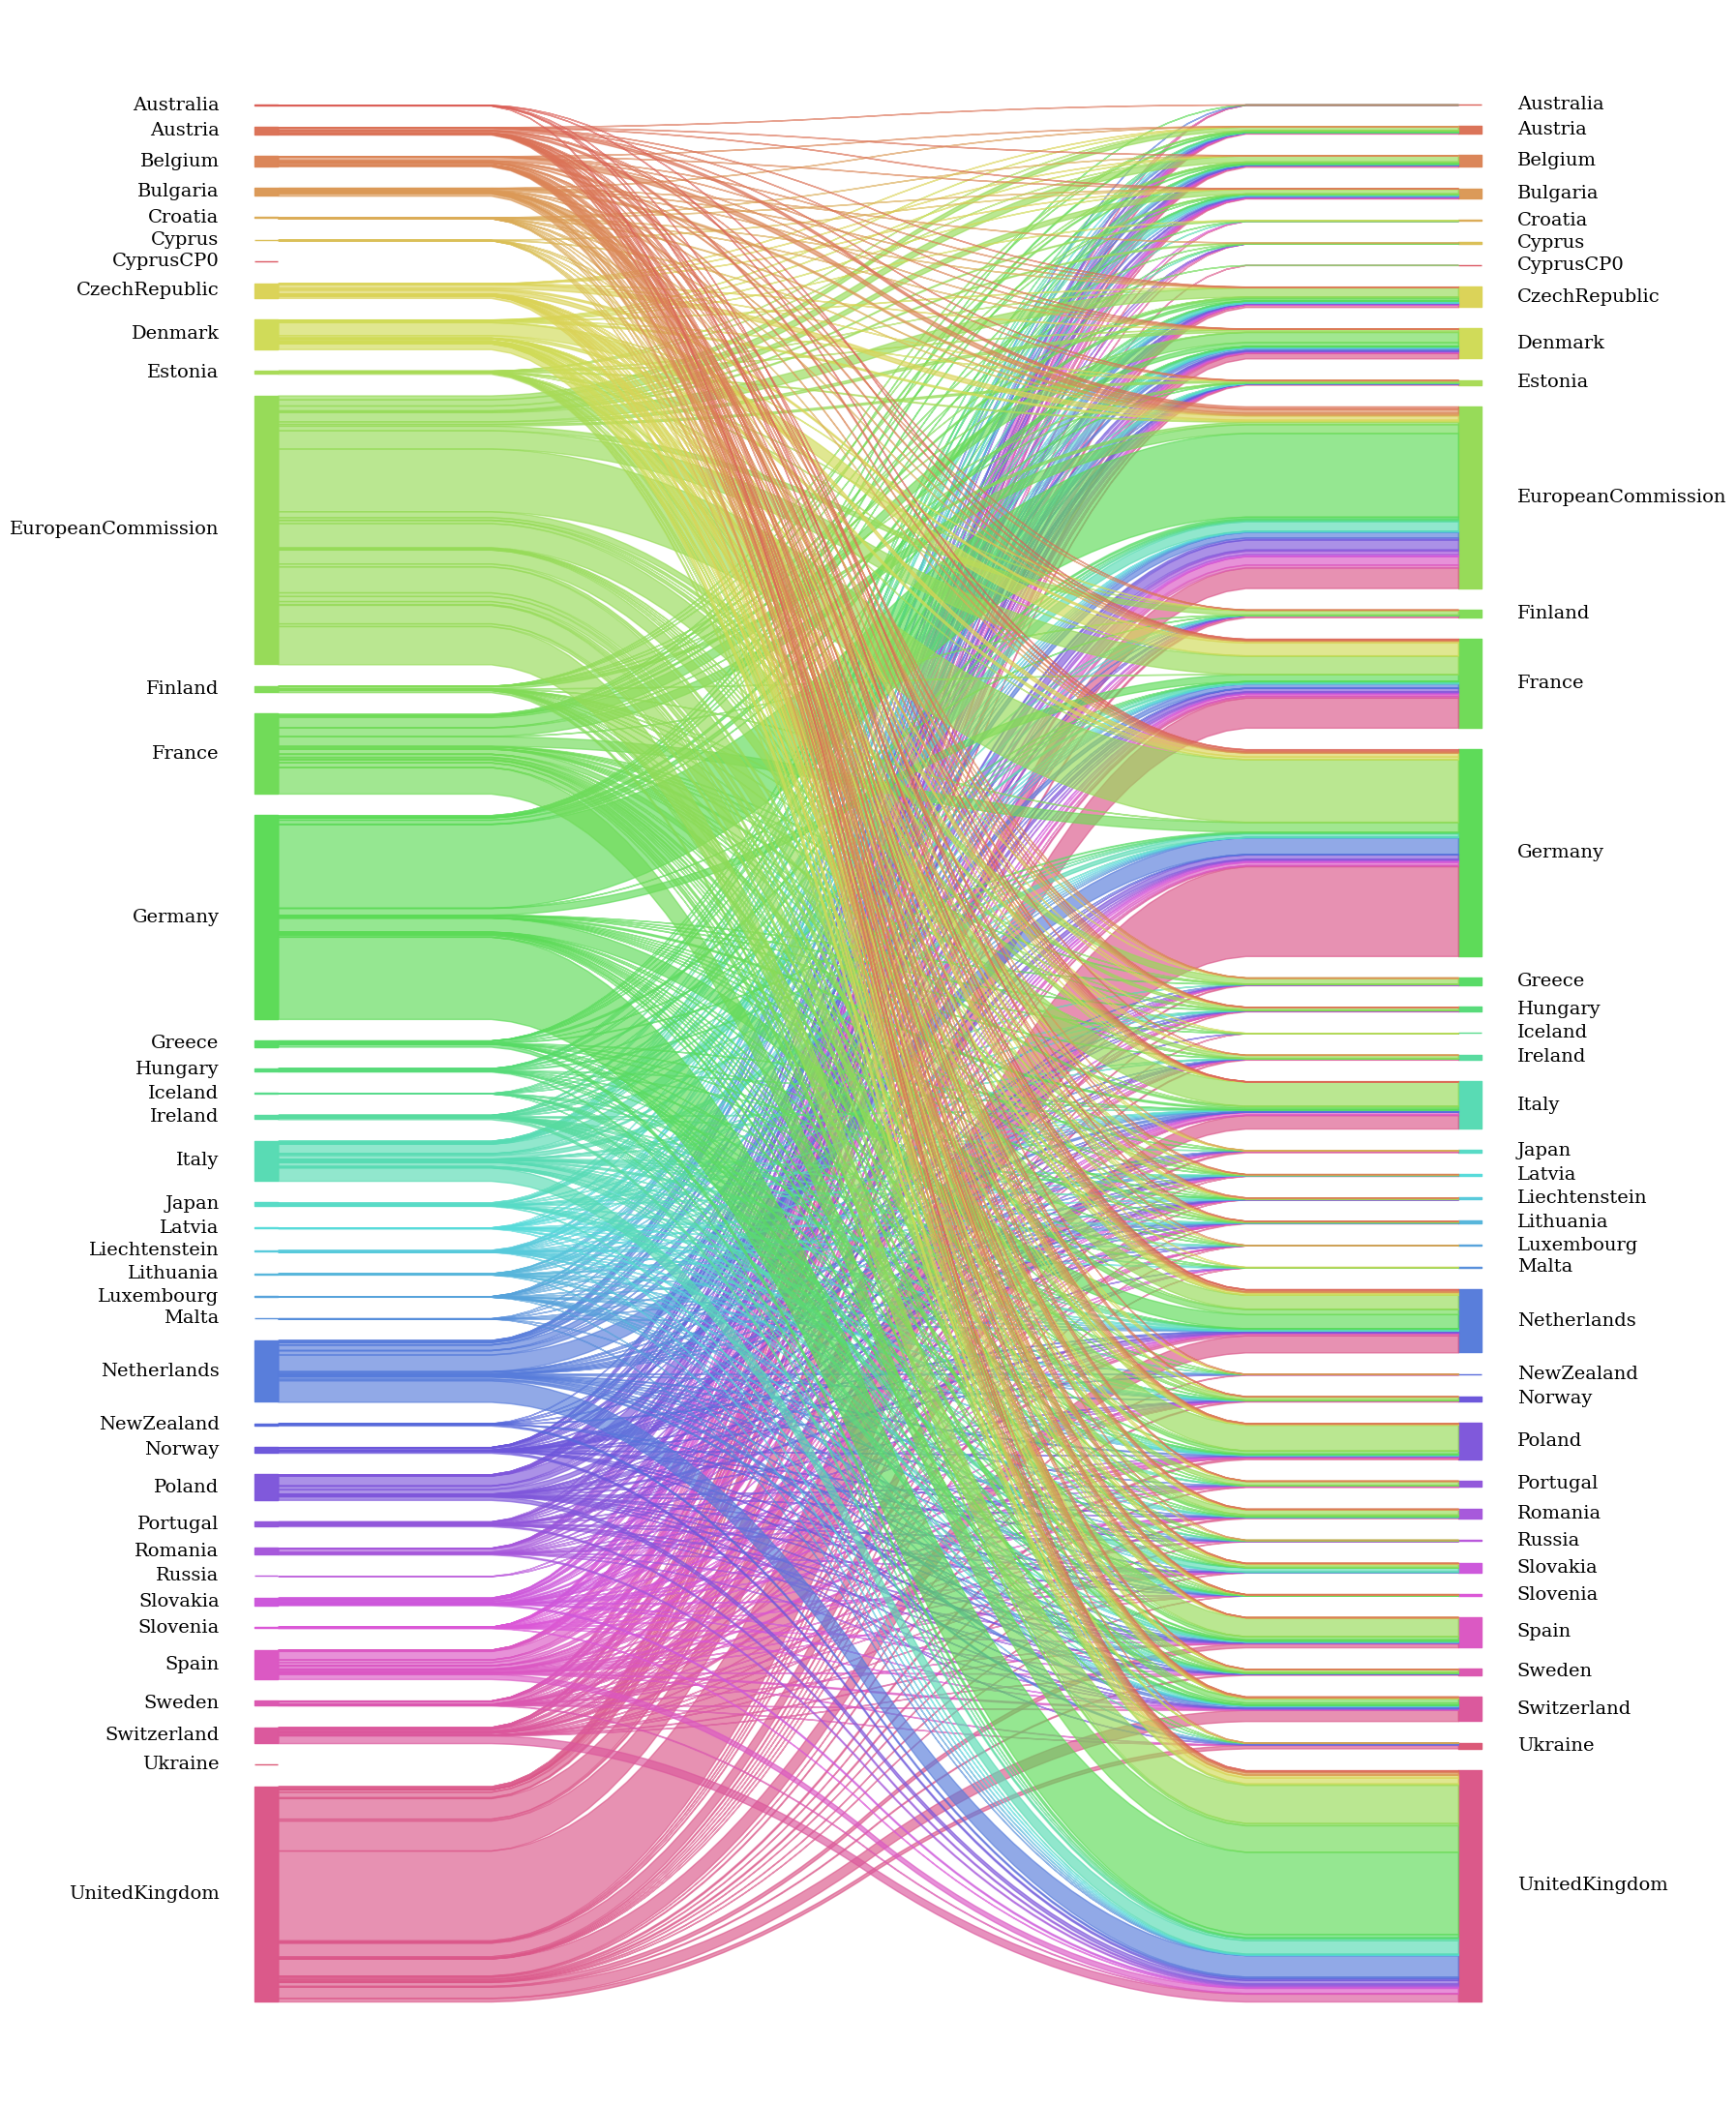

In [14]:
pairs_ns = pd.read_csv('Paired_noself.csv')
pairs_ns = pairs_ns[pairs_ns['Self?']=='No']

ax2 = plt.axes()

ax2 = sankey(
    left=pairs_ns["AcquiringRegistry"], right=pairs_ns["TransferringRegistry"], 
    leftWeight= pairs_ns["NbOfUnits"], rightWeight=pairs_ns["NbOfUnits"],
    leftLabels=np.flip(np.sort(pairs_ns['TransferringRegistry'].unique())),rightLabels=np.flip(np.sort(pairs_ns['TransferringRegistry'].unique())),
    ax=ax2
)

fig2 = ax2.get_figure()
fig2.set_size_inches(18, 28)
fig2.savefig('ETS_Sankey_ns.png',bbox_inches='tight',dpi=250)
fig2

In [27]:
acq = pairs.groupby('AcquiringRegistry').sum(numeric_only=True).reset_index().rename(columns={"NbOfUnits": "NbOfUnitsAcquired"})
trf = pairs.groupby('TransferringRegistry').sum(numeric_only=True).reset_index().rename(columns={"NbOfUnits": "NbOfUnitsTransferred"})
merged = pd.merge(acq,trf,how='outer',left_on='AcquiringRegistry',right_on='TransferringRegistry')
merged['Net Units Acquired'] = merged['NbOfUnitsAcquired'] - merged['NbOfUnitsTransferred']
merged

AcquiringRegistry  NbOfUnitsAcquired TransferringRegistry  \
0            Australia           35546481            Australia   
1              Austria         2528136609              Austria   
2              Belgium         4807848947              Belgium   
3             Bulgaria         2164147850             Bulgaria   
4              Croatia          347489161              Croatia   
5               Cyprus          123171000               Cyprus   
6            CyprusCP0           67110876            CyprusCP0   
7        CzechRepublic         6395673317        CzechRepublic   
8              Denmark         5203778900              Denmark   
9                  ESD             314417                  ESD   
10             Estonia          989859175              Estonia   
11  EuropeanCommission        16066314672   EuropeanCommission   
12             Finland         2880294935              Finland   
13              France        22315975725               France   
14             Germany        56989235447              Germany   
15              Greece         4063327310               Greece   
16             Hungary         2225387060              Hungary   
17             Iceland           35954063              Iceland   
18             Ireland         1954445844              Ireland   
19               Italy        15627434699                Italy   
20               Japan          207805884                Japan   
21              Latvia          377271167               Latvia   
22       Liechtenstein          148630030        Liechtenstein   
23           Lithuania          701137583            Lithuania   
24          Luxembourg          255055641           Luxembourg   
25               Malta           53299611                Malta   
26            MaltaCP0           27603153             MaltaCP0   
27         Netherlands        12015764221          Netherlands   
28          NewZealand          124325855           NewZealand   
29     NorthernIreland           22514869      NorthernIreland   
30              Norway         1421026968               Norway   
31              Poland        15153253362               Poland   
32            Portugal         2976720019             Portugal   
33             Romania         4880908288              Romania   
34              Russia            1913351               Russia   
35            Slovakia         2139757131             Slovakia   
36            Slovenia          596368816             Slovenia   
37               Spain        13876270620                Spain   
38              Sweden         1909613727               Sweden   
39         Switzerland          939817210          Switzerland   
40             Ukraine                  0              Ukraine   
41       UnitedKingdom        54570419106        UnitedKingdom   

    NbOfUnitsTransferred  Net Units Acquired  
0                6604592            28941889  
1             2520230028             7906581  
2             4897240149           -89391202  
3             2295028877          -130881027  
4              343259587             4229574  
5              157922175           -34751175  
6               67720876             -610000  
7             6734878752          -339205435  
8             5214805248           -11026348  
9                      0              314417  
10            1090241927          -100382752  
11           10958355882          5107958790  
12            2961009418           -80714483  
13           22840519412          -524543687  
14           57161937087          -172701640  
15            4149093954           -85766644  
16            2300791434           -75404374  
17              35150979              803084  
18            1992250603           -37804759  
19           16056998366          -429563667  
20             131068628            76737256  
21             437960027           -60688860  
22             148677841              -47811  
23             776366646           -75

[Text(0.4, 0, 'Australia'),
 Text(1.4, 0, 'Austria'),
 Text(2.4, 0, 'Belgium'),
 Text(3.4, 0, 'Bulgaria'),
 Text(4.4, 0, 'Croatia'),
 Text(5.4, 0, 'Cyprus'),
 Text(6.4, 0, 'CyprusCP0'),
 Text(7.4, 0, 'CzechRepublic'),
 Text(8.4, 0, 'Denmark'),
 Text(9.4, 0, 'ESD'),
 Text(10.4, 0, 'Estonia'),
 Text(11.4, 0, 'EuropeanCommission'),
 Text(12.4, 0, 'Finland'),
 Text(13.4, 0, 'France'),
 Text(14.4, 0, 'Germany'),
 Text(15.4, 0, 'Greece'),
 Text(16.4, 0, 'Hungary'),
 Text(17.4, 0, 'Iceland'),
 Text(18.4, 0, 'Ireland'),
 Text(19.4, 0, 'Italy'),
 Text(20.4, 0, 'Japan'),
 Text(21.4, 0, 'Latvia'),
 Text(22.4, 0, 'Liechtenstein'),
 Text(23.4, 0, 'Lithuania'),
 Text(24.4, 0, 'Luxembourg'),
 Text(25.4, 0, 'Malta'),
 Text(26.4, 0, 'MaltaCP0'),
 Text(27.4, 0, 'Netherlands'),
 Text(28.4, 0, 'NewZealand'),
 Text(29.4, 0, 'NorthernIreland'),
 Text(30.4, 0, 'Norway'),
 Text(31.4, 0, 'Poland'),
 Text(32.4, 0, 'Portugal'),
 Text(33.4, 0, 'Romania'),
 Text(34.4, 0, 'Russia'),
 Text(35.4, 0, 'Slovakia'),
 Tex

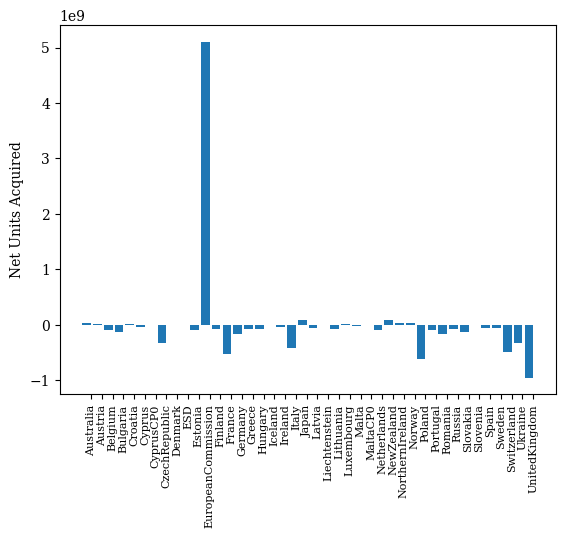

In [34]:
fig, ax = plt.subplots()
rects1 = ax.bar(merged.index,merged['Net Units Acquired'])

# add some text for labels, title and axes ticks
ax.set_ylabel('Net Units Acquired')
ax.set_xticks(merged.index + 0.8 / 2)
ax.set_xticklabels(merged['AcquiringRegistry'],rotation=90,fontsize=8)
